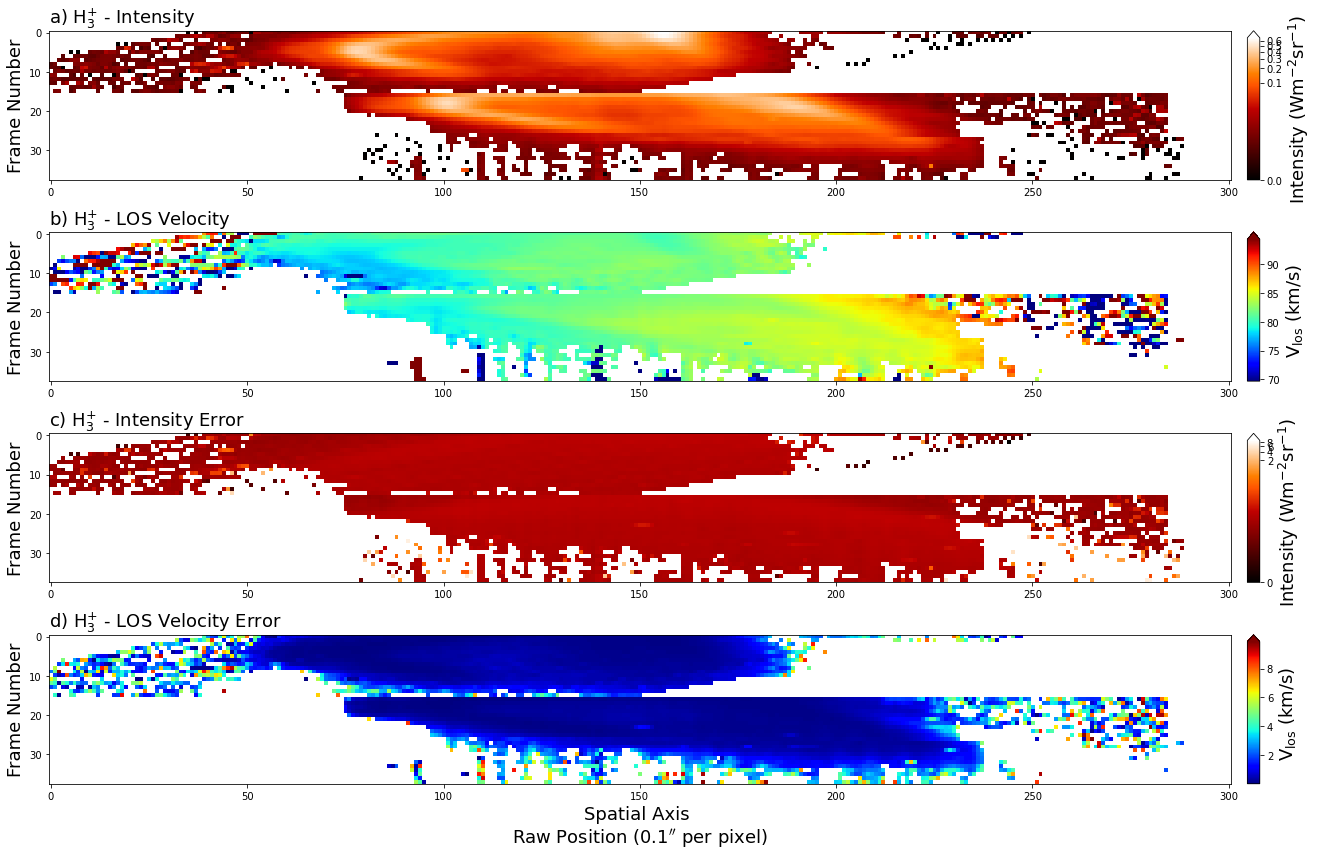

In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model, fit_report
from lmfit.models import LinearModel


h3p_int_shifted = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_los_shifted = fits.open('h3p_los_shifted.fits', ignore_missing_end=True)[0].data
h3p_int_shifted_error = fits.open('h3p_int_shifted_error.fits', ignore_missing_end=True)[0].data
h3p_los_shifted_error = fits.open('h3p_los_shifted_error.fits', ignore_missing_end=True)[0].data

fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(412)
plt.imshow(h3p_los_shifted, cmap='jet')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

fig.add_subplot(413)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h3p_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('c) H$_3^{+}$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(414)
plt.imshow(h3p_los_shifted_error, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('d) H$_3^{+}$ - LOS Velocity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{los}}$ (km/s)',size=18)

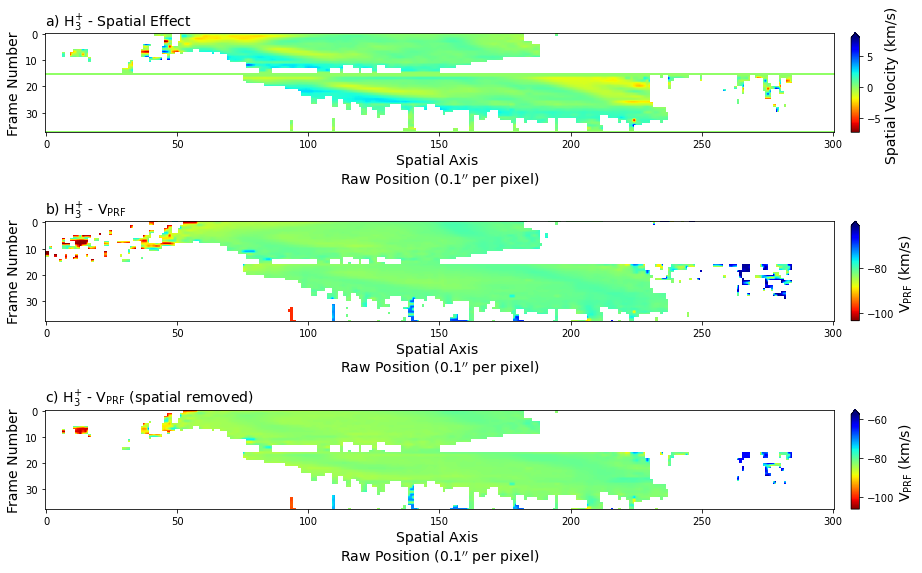

In [2]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,300,301)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

h3p_plan_vel = h3p_los_shifted + 0

for i in range(np.size(h3p_los_shifted, 0)):
    h3p_plan_vel[i,:] = h3p_los_shifted[i,:] - rot_rate


spatial_velocity = h3p_int_shifted + 0
spatial_velocity[::] = 0

for i in range(np.size(spatial_velocity, 1)):
    for j in range(1, np.size(spatial_velocity, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            p = np.array((h3p_int_shifted[j-1][i], h3p_int_shifted[j][i], h3p_int_shifted[j+1][i]))
#             print(j,i)
    #         plt.figure()
    #         plt.plot(y, p, 'k.', label='original')
            f = sp.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
    #         plt.figure()
    #         plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
    #         print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            dv = 7.99*di

            if np.isreal(dv):
                spatial_velocity[j,i] = dv

# spatial_velocity2[np.isnan(h3p_plan_vel2)] = np.nan

h3p_corrected_vel = h3p_plan_vel-spatial_velocity

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_plan_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h3p_corrected_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

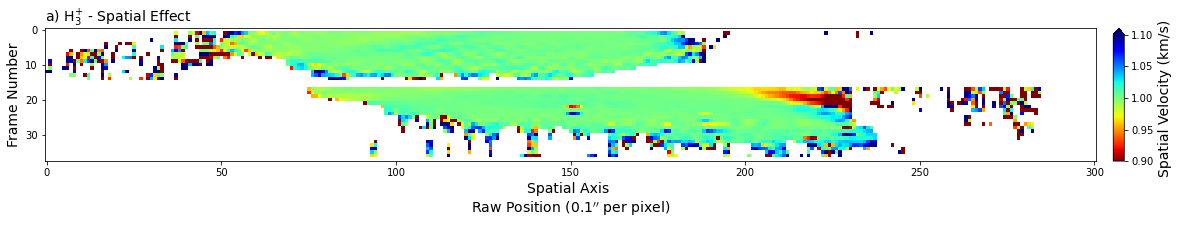

In [4]:
spatial_velocity2 = h3p_int_shifted * np.nan

b_err = 0.10641512039513978

di1_arr = h3p_int_shifted * np.nan
di2_arr = h3p_int_shifted * np.nan
di_arr = h3p_int_shifted * np.nan

for i in range(np.size(spatial_velocity2, 1)):
# for i in range(1):
    for j in range(1, np.size(spatial_velocity2, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            a = h3p_int_shifted[j-1][i] - h3p_int_shifted_error[j-1][i]
            b = h3p_int_shifted[j][i]
            c = h3p_int_shifted[j+1][i] + h3p_int_shifted_error[j+1][i]
            p = np.array((a, b, c))
            d = h3p_int_shifted[j-1][i] + h3p_int_shifted_error[j-1][i]
            e = h3p_int_shifted[j][i]
            f = h3p_int_shifted[j+1][i] - h3p_int_shifted_error[j+1][i]
            q = np.array((d, e, f))
            l = h3p_int_shifted[j-1][i]
            m = h3p_int_shifted[j][i]
            n = h3p_int_shifted[j+1][i]
            r = np.array((l, m, n))
#             print(j,i)
#             plt.figure()
#             plt.plot(y, p, 'k', label='original')
            f1 = sp.interpolate.interp1d(y,p)
            f2 = sp.interpolate.interp1d(y,q)
            f = sp.interpolate.interp1d(y,r)
            xnew = np.linspace(0,2,7)
#             plt.figure()
#             plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
#             print(f(xnew[2]), f(xnew[4]))
            p11 = f1(xnew[2])
            p31 = f1(xnew[4])
            p12 = f2(xnew[2])
            p32 = f2(xnew[4])
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di1 = (p31 - p11)/(p31 + p11)
            di2 = (p32 - p12)/(p32 + p12)
            di = (p3 - p1)/(p3 + p1)
            
#             di1_arr.append(di1)
#             di2_arr.append(di2)
#             di_arr.append(di)
            
#             print('di1 = '+str(di1))
#             print('di2 = '+str(di2))
            sig = (di1-di2)/2.
#             sig = np.nanmean(di1-di) + np.nanmean()
#             print('sig = '+str(sig))
            
            dv = 7.99*di
            dv_err = dv * np.sqrt((b_err/7.99)**2 + (sig/di)**2)
#             print('dv_err = '+str(dv_err))
#             print('dv = '+str(dv))
            if np.isreal(dv_err):
                spatial_velocity2[j,i] = dv_err
                di1_arr[j,i] = di1
                di2_arr[j,i] = di2
                di_arr[j,i] = di
# di1_arr = np.array(di1_arr)
# di2_arr = np.array(di2_arr)
# di_arr = np.array(di_arr)
# plt.figure()
# plt.plot(di1_arr-di_arr)
# plt.plot(di_arr - di2_arr)

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow((di1_arr-di_arr)/(di_arr-di2_arr), vmin=0.9, vmax=1.1, cmap='jet_r')
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

# fig.add_subplot(312)
# plt.imshow(di2_arr, cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)

# fig.add_subplot(313)
# plt.imshow(di_arr, cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)

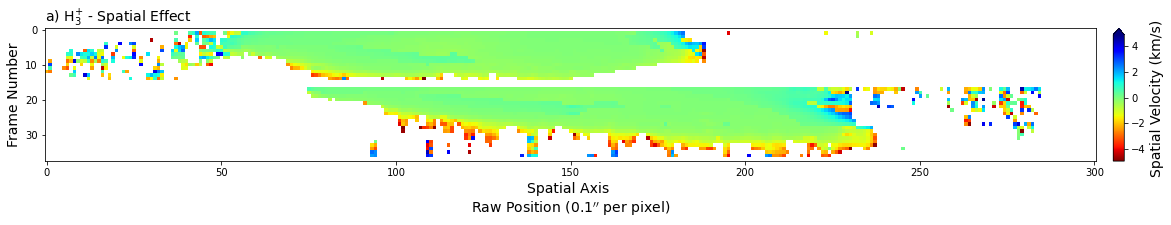

In [5]:
spatial_velocity2[spatial_velocity2 > 5] = np.nan
spatial_velocity2[spatial_velocity2 < -5] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity2, cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

In [6]:
np.nanmin(spatial_velocity2)

-4.964911212016545

In [7]:
hdu = fits.PrimaryHDU(spatial_velocity2)
hdu.writeto('h3p_spat_err.fits', overwrite=True)